số hiệu đầu ra dạng bình phương cộng thêm với nhiễu không phải dạng tuyến tính nên ta không thể dùng hồi quy tuyến tính để giải bài này. Nhưng ta vẫn có thể giải bài này hai hồi quy tuyến tính bằng cách thay đổi số hiệu đầu vào có dang đa thức

# Làm theo thầy

In [1]:
from sklearn import datasets, linear_model
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
np.random.seed(10)
m = 1000
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

số liệu ko tuyến tính thì ta bình phương số liệu lên thì ta có thể giải theo kiểu hồi quy tuyến tính

In [4]:
X2 = X**2
# Ghép 2 cột X, X2 thành 1 ma trận 10 hàng 2 cột

In [5]:
X_poly = np.hstack([X,X2])
X_poly

array([[ 1.62792386,  2.65013609],
       [-2.8754883 ,  8.26843299],
       [ 0.80188941,  0.64302663],
       ...,
       [-2.00932453,  4.03738507],
       [ 1.13968791,  1.29888854],
       [-2.42886433,  5.89938194]])

In [6]:
lin_reg = linear_model.LinearRegression()
# a + bx + cx^2
lin_reg.fit(X_poly,y)

LinearRegression()

In [7]:
print(lin_reg.intercept_)

[1.97330201]


In [8]:
print(lin_reg.coef_)

[[1.00515447 0.50245135]]


In [9]:
a = lin_reg.intercept_[0]
b = lin_reg.coef_[0,0]
c = lin_reg.coef_[0,1]
a,b,c

(1.9733020137461184, 1.0051544717316752, 0.5024513530096276)

In [10]:
x_ve = np.linspace(-3,3,m)
y_ve = a + b*x_ve + c*(x_ve**2)

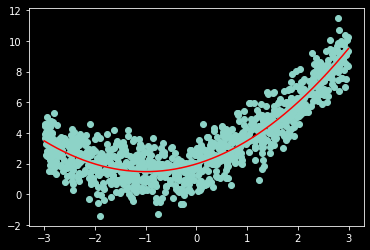

In [11]:
plt.plot(X,y,'o')
plt.plot(x_ve,y_ve,'r')
plt.show()

# Tính sai số

tính bằng công thức

In [12]:
# sai số bình phương trung bình
loss = 0
for i in range(0,m):
    y_mu = a + b*X_poly[i,0] + c*X_poly[i,1]
    sai_so = (y[i] - y_mu)**2
    loss = loss + sai_so
loss = loss/(2*m)

In [13]:
loss

array([0.48111188])

tính bằng scikit-learn

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
y_train_predict = lin_reg.predict(X_poly)

In [16]:
meanSquaredError = mean_squared_error(y,y_train_predict)

In [17]:
meanSquaredError/2

0.4811118832309437

lựa chọn bậc để có sai số nhỏ nhất

# thử nhiễu

In [18]:
from sklearn import datasets, linear_model
import numpy as np
import matplotlib.pyplot as plt

In [19]:
np.random.seed(100)

In [20]:
m = 20
X = 10*np.random.rand(m,1) - 5
Y = 2*X + 1 + np.random.rand(m,1)

# Tạo nhiễu
Y[15] = [100]

In [21]:
# X = X.reshape(1,m)
# Y = Y.reshape(1,m)
X.shape, Y.shape

((20, 1), (20, 1))

In [22]:
lin_reg = linear_model.LinearRegression()

In [23]:
lin_reg.fit(X,Y)

LinearRegression()

In [24]:
a = lin_reg.coef_[0]
b = lin_reg.intercept_[0]
a,b

x_draw = np.linspace(-5,5,100)
y_draw = b + a*x_draw

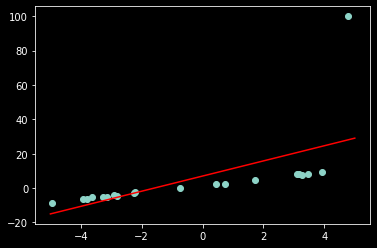

In [25]:
plt.plot(X,Y,'o')
plt.plot(x_draw,y_draw,'r')
plt.show()

dùng hồi quy Huber để khử nhiễu

In [26]:
hub_reg = linear_model.HuberRegressor()

In [27]:
hub_reg.fit(X,Y)

C:\Users\HONG PHAT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HuberRegressor()

In [28]:
a = hub_reg.coef_[0]
b = hub_reg.intercept_[0]
a,b

x_draw = np.linspace(-5,5,100)
y_draw = b + a*x_draw

IndexError: invalid index to scalar variable.

In [ ]:
plt.plot(X,Y,'o')
plt.plot(x_draw,y_draw,'r')
plt.show()

Hồi quy ridge là để tích được ma trận nghịch đảo trong trường hợp phức tạp

# Overfitting (quá khớp)

Overfitting là nhận dạng đúng 100% dữ liệu training, nghĩa là học bài nào thì thuộc bài đấy. Có khả năng khi có dữ liệu mới chưa học thì sẽ nhận dạng sai

dữ liệu có đánh nhãn: có giám sát

dữ liệu không có đánh nhãn: ko giám sát